In [18]:
import numpy as np
import matplotlib.pyplot as plt

1) Como vimos em aula, é possível usar Poisson para modelar uma pesca. Suponha que um
pescador pesca por 10 horas com taxa de chegada de peixes λ = 1/h. Agora, suponha também
que, após cada peixe pescado, o pescador interrompe a pesca e gasta meia hora limpando o
peixe antes de retomar a pescaria. 

a) Plote um exemplo dessa pesca.

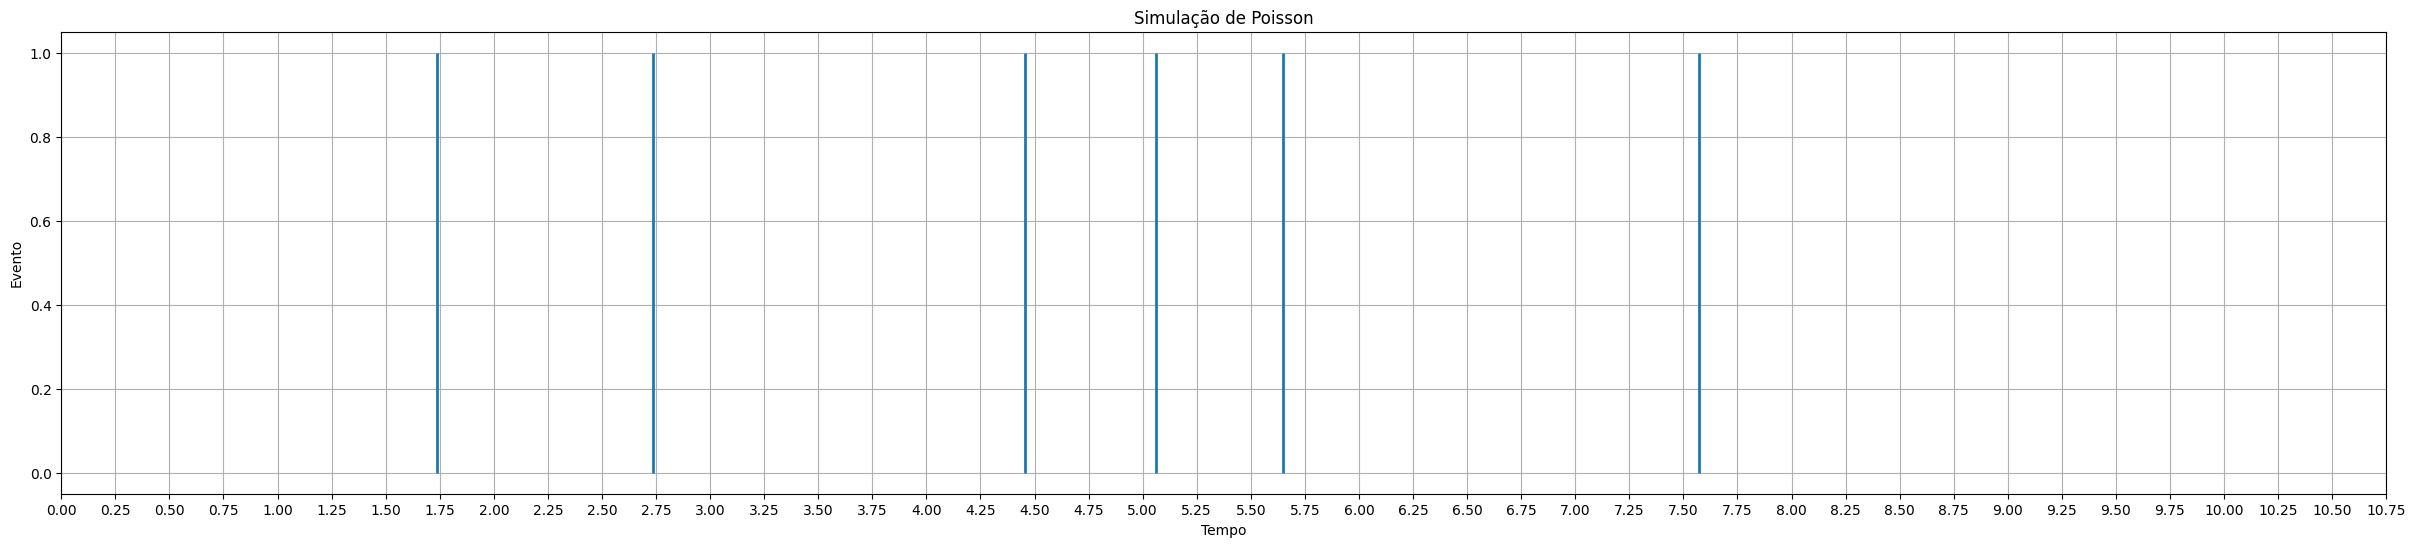

In [205]:
#A)
# Lambda (taxa de chegada)
lamb = 1

# Seta intervalo de tempo
t_inicial = 0
t_final = 10

# Calcula esperança de numero de eventos no intervalo
eventos_esperados = lamb * (t_final - t_inicial)

# Gera numero de eventos de Poisson
eventos = np.random.poisson(eventos_esperados)

# Gera tempos para o numero de eventos acima
tempo_eventos = np.sort(np.random.uniform(t_inicial, t_final, size=eventos))

eventos_mod = 1
tempo_eventos_mod = [tempo_eventos[0]]
for i in range(1,len(tempo_eventos)-1):
    dif = tempo_eventos[i]-tempo_eventos_mod[-1]
    if dif>0.5:
        tempo_eventos_mod.append(tempo_eventos[i])
        eventos_mod+=1
plt.figure(figsize=(t_final*3, 6))
plt.vlines(tempo_eventos_mod, 0, 1, linewidth=2)
plt.xlim(t_inicial, t_final)
plt.xticks(np.arange(t_inicial,t_final+1,0.25))
plt.xlabel('Tempo')
plt.ylabel('Evento')
plt.title('Simulação de Poisson')
plt.grid()
plt.show()

b) Usando Monte Carlo, gere um gráfico da probabilidade de cada quantidade de peixes pescados (isto é, um gráfico de
Nº de Peixes X Probabilidade, que mostre qual a probabilidade de a pescaria resultar em 0, 1,
2, 3,... peixes).

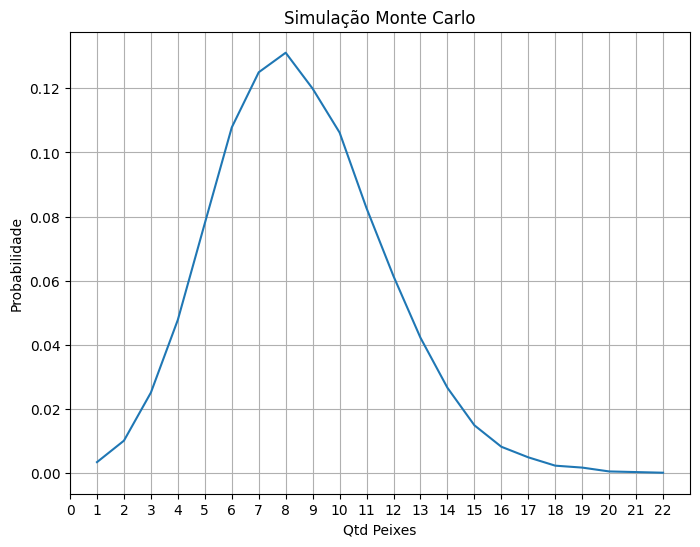

In [286]:
#B)
# Lambda (taxa de chegada)
lamb = 1

# Seta intervalo de tempo
t_inicial = 0
t_final = 10

sims = 10000
qtd_pescada = []
for i in range(sims):
    # Calcula esperança de numero de eventos no intervalo
    eventos_esperados = lamb * (t_final - t_inicial)

    # Gera numero de eventos de Poisson
    eventos = np.random.poisson(eventos_esperados)
    if eventos==0:
        eventos = 1

    # Gera tempos para o numero de eventos acima
    tempo_eventos = np.sort(np.random.uniform(t_inicial, t_final, size=eventos))

    eventos_mod = 1
    tempo_eventos_mod = [tempo_eventos[0]]
    for i in range(1,len(tempo_eventos)-1):
        dif = tempo_eventos[i]-tempo_eventos_mod[-1]
        if dif>0.5:
            eventos_mod+=1
    qtd_pescada.append(eventos_mod)

probs = {}
for i in np.unique(qtd_pescada):
    probs[i] = qtd_pescada.count(i)/sims

plt.figure(figsize=(8, 6))
plt.plot(probs.keys(), probs.values())
plt.xlim(0, max(qtd_pescada)+1)
plt.xticks(np.arange(0,max(qtd_pescada)+1))
plt.xlabel('Qtd Peixes')
plt.ylabel('Probabilidade')
plt.title('Simulação Monte Carlo')
plt.grid()
    

c) Analisando os resultados anteriores, essa pescaria continua sendo bem modelada como um processo de Poisson? Justifique.

RESPOSTA:

2) Considere o exercício das 2 máquinas (exercício 4, slides de aula de cadeia de Markov Contínua).
Simule e plote os resultados do tempo que as máquinas passam em cada estado para vários pares
de valores de (λ, μ). Analise e comente os resultados.

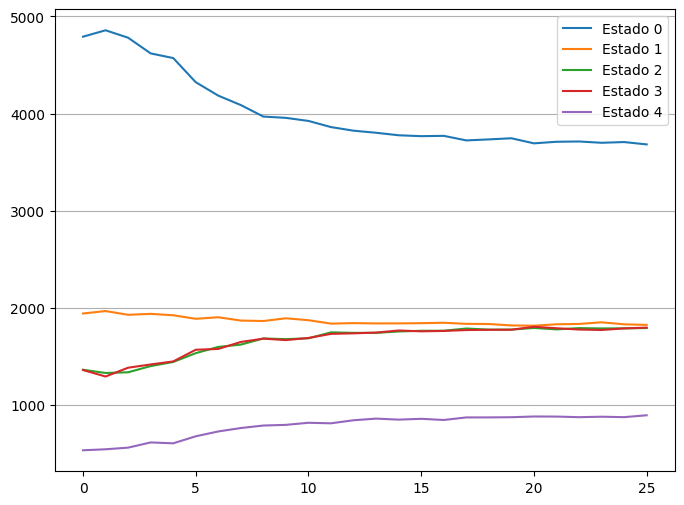

In [204]:
# gerando os diferentes pares lambda,mu
pares = [(1,1.5)]
for i in range(25):
    lamb, mu = pares[-1]
    pares.append((lamb+i/10,mu+i/10))

# tempo maximo:
t_final = 10000

# guarda os tempos de cada maquina:
tempos_tot = [[],[],[],[],[]]

# testando para todos os pares de lambda e mu:
for lamb, mu in pares:
    """
        estado 0 todas funcionando
        estado 1 maq1 quebra, maq2 funcionando
        estado 2 maq1 quebrou primeiro e maq2 logo em seguida ((todas quebradas))
        estado 3 maq2 quebr, maq 1 funcionando
        estado 4 maq2 quebrou primeiro e maq1 logo em seguida ((todas quebradas))
    """
    transition_rates = ([0,  lamb, 0,    0,  0   ],
                        [mu, 0,    lamb, 0,  0   ],
                        [0,  0,    0,    mu, 0   ],
                        [mu, 0,    0,    0,  lamb],
                        [0,  0,    mu,    0,  0   ])

    estado = 0
    tempo_estados = [0,0,0,0,0]

    while sum(tempo_estados) < t_final:
        tempos = []
        for tr in transition_rates[estado]:
            if(tr == 0):
                tempos.append(float('inf'))
            else:
                tempos.append(np.random.exponential(1/tr))
                tempo_estados[estado] += min(tempos)
                estado = tempos.index(min(tempos))
    
    for i in range(len(tempos_tot)):
        tempos_tot[i].append(tempo_estados[i])

plt.figure(figsize=(8, 6))
for index,i in enumerate(tempos_tot):
    plt.plot(i, label = 'Estado ' + str(index))
plt.grid(axis='y')
plt.legend()
plt.show()


3) Considere o exercício do Spa (exercício 5, slides de aula de cadeia de Markov Contínua).


a) Considerando μ1 = μ2 = 1, simule o problema e plote o gráfico do número médio de
pessoas no sistema (L) pela taxa de chegada (λ).



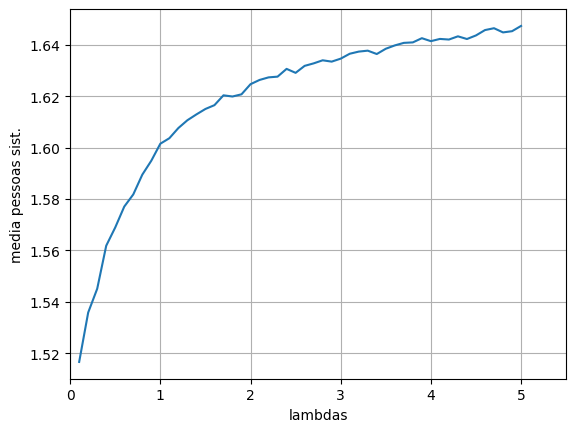

In [254]:
#A)
t_final = 10000
mu1 = 1
mu2 = 1
lamb = [0]
pessoas = []

for i in range(50):
    lamb.append(lamb[-1] + 0.1)
lamb.pop(0)

for taxa_chegada in lamb:
    """
        estado 0 ninguem no sistema 00
        estado 1 uma pessoa na cadeira de massagem 10
        estado 2 uma pessoa na cadeira de acupuntura 01
        estado 3 duas pessoas uma em cada cadeira 11
        estado 4 primeira cadeira acabou, esperando segunda cadeira liberar E1
    """
    transition_rates = [[0,      taxa_chegada,    0,       0,            0],
                        [0,      0,               mu1,     0,            0],
                        [mu2,    0,               0,       taxa_chegada, 0],
                        [0,      mu2,             0,       0,            mu1],
                        [0,      0,               mu2,     0,            0]]

    pessoas_sub = [0]
    estado = 0
    tempo_total = 0

    while tempo_total < t_final:
        tempos = []
        for tr in transition_rates[estado]:
            if tr == 0:
                tempos.append(float('inf'))
            else:
                tempos.append(np.random.exponential(1 / tr))

        
        tempo_total += min(tempos)
        estado = tempos.index(min(tempos))

        # atualiza o número de pessoas no sistema
        if estado == 0:
            pass  
        elif estado == 1:
            if pessoas_sub[-1] < 2:  
                # max de 2 pessoas
                pessoas_sub.append(pessoas_sub[-1] + 1)
            else:
                # se ta cheio, nao muda
                pessoas_sub.append(pessoas_sub[-1])  
        elif estado == 2:
            # uma pessoa sai da acupuntura
            if pessoas_sub[-1] > 0:
                pessoas_sub.append(pessoas_sub[-1] - 1)
            else:
                # nao muda se nao tem ninguem
                pessoas_sub.append(pessoas_sub[-1])  
        elif estado == 3:
            # uma pessoa na massagem termina e espera
            if pessoas_sub[-1] < 2:  
                # maximo de 2 pessoas
                pessoas_sub.append(pessoas_sub[-1] + 1)
            else:
                # se ta cheio, nao muda
                pessoas_sub.append(pessoas_sub[-1])  
                
        elif estado == 4:
            # espera na massagem
            pessoas_sub.append(pessoas_sub[-1])

    pessoas.append(pessoas_sub)

medias = [np.mean(sub) for sub in pessoas]
plt.plot(lamb, medias)
plt.xlim(0,lamb[-1]+.5)
plt.xlabel('lambdas')
plt.ylabel('media pessoas sist.')
plt.grid()
plt.show()



b) Fixando a taxa de chegada em λ = 0.8, simule o problema e plote o gráfico do número
médio de pessoas no sistema (L) e o tempo de espera (W) pelo tamanho permitido da
fila de espera (E). Considere que segundo o enunciado original, a fila de espera do Spa
tem tamanho 0, mas que agora é possível que haja pessoas no Spa aguardando
serviço.

/tmp/ipykernel_9849/3027345346.py:91: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(tamanhos_fila, pessoas, 'b-o', color='red', label='pessoas')


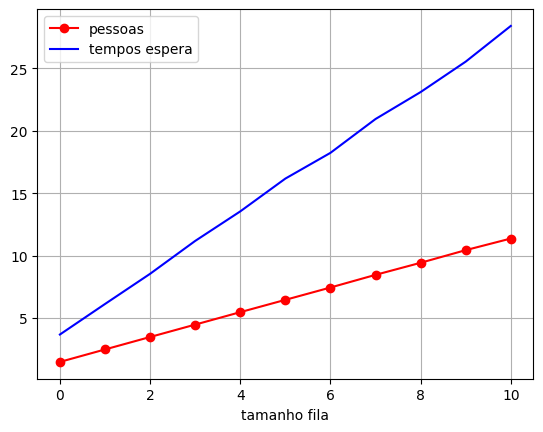

In [292]:
t_final = 10000
mu1 = 1
mu2 = 1
taxa_chegada = 0.8

tamanhos_fila = []
pessoas = []
tempos_espera = []

for i in range(11):
    tamanhos_fila.append(i)

for tam_fila in tamanhos_fila:
    """
    estado 0 ninguem no sistema 00
    estado 1 uma pessoa na cadeira de massagem 10
    estado 2 uma pessoa na cadeira de acupuntura 01
    estado 3 duas pessoas uma em cada cadeira 11
    estado 4 primeira cadeira acabou, esperando segunda cadeira liberar E1
    """
    # dicts para os tempos
    # quando cada cliente chega
    chegadas = {}
    # quando cada cliente sai
    saidas = {}
    # id dos cliente
    id_cliente = 0 
    
    transition_rates = [[0,      taxa_chegada,    0,       0,            0],
                        [0,      0,               mu1,     0,            0],
                        [mu2,    0,               0,       taxa_chegada, 0],
                        [0,      mu2,             0,       0,            mu1],
                        [0,      0,               mu2,     0,            0]]
    
    pessoas_sub = [0]
    estado = 0
    tempo_total = 0
    max_sistema = tam_fila + 2
    
    while tempo_total < t_final:
        tempos = []
        for tr in transition_rates[estado]:
            if tr == 0:
                tempos.append(float('inf'))
            else:
                # se o sistema ta cheio, nao permite mais gente
                if (estado in [0, 2]) and pessoas_sub[-1] >= max_sistema:
                    tempos.append(float('inf'))
                else:
                    tempos.append(np.random.exponential(1 / tr))
        
        tempo_min = min(tempos)
        tempo_total += tempo_min
        prox_estado = tempos.index(min(tempos))
        
        # chegada
        if (prox_estado == 1 or prox_estado == 3) and pessoas_sub[-1] < max_sistema:
            chegadas[id_cliente] = tempo_total
            id_cliente += 1
            pessoas_sub.append(pessoas_sub[-1] + 1)
            
        # saindo da acupuntura
        elif prox_estado == 2:
            if pessoas_sub[-1] > 0:
                # Encontra cliente mais antigo que ainda não saiu
                cliente_saindo = min([cid for cid in chegadas.keys() 
                                    if cid not in saidas])
                saidas[cliente_saindo] = tempo_total
                pessoas_sub.append(pessoas_sub[-1] - 1)
            else:
                pessoas_sub.append(pessoas_sub[-1])
                
        # espera
        elif prox_estado == 4:
            pessoas_sub.append(pessoas_sub[-1])
        else:
            pessoas_sub.append(pessoas_sub[-1])
            
        estado = prox_estado
    
    # num medio no sist
    pessoas.append(np.mean(pessoas_sub))
    
    # tempo medio espera
    tempos_espera_sub = []
    for cid in saidas.keys():
        tempos_espera_sub.append(saidas[cid] - chegadas[cid])
    
    tempos_espera.append(np.mean(tempos_espera_sub) if tempos_espera_sub else 0)

plt.plot(tamanhos_fila, pessoas, 'b-o', color='red', label='pessoas')
plt.plot(tamanhos_fila, tempos_espera, color='blue', label='tempos espera')
plt.xlabel('tamanho fila')
plt.legend()
plt.grid()
plt.show()

4) Considere uma fila de banco M/M/1 com taxa de chegada λ = 1 e taxa de serviço μ = 1.2.
Considere ainda que cada cliente que chega tem uma probabilidade P de ser um cliente
Preferencial, e que o cliente preferencial passa na frente de todos os clientes regulares.

a) Simule e plote o gráfico do tempo médio de espera W por alguns valores de P (inclua
P=0).

b) Simule e plote um boxplot (também chamado de box & whisker plot) do tempo de
espera por alguns valores de P (inclua P=0).

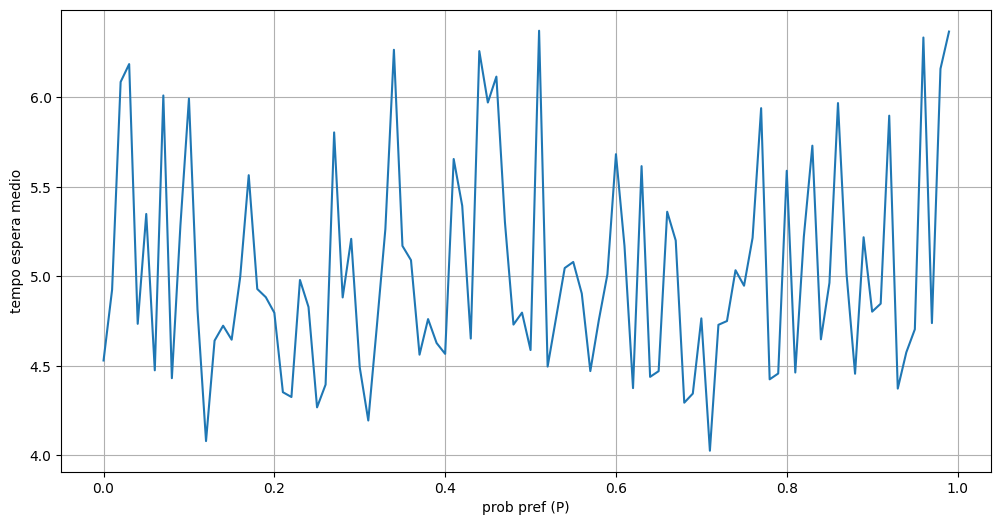

In [333]:
# A)
def banco(P):
    lambda_val=1 
    mu=1.2
    t_final=10000

    # dicts para os tempos
    # quando cada cliente chega
    chegadas = {}
    # quando cada cliente sai
    saidas = {}
    # id dos cliente
    id_cliente = 0 
    # true se for pref
    tipo_cliente = {}
    
    
    tempo_total = 0
    # essas filas guardam id
    fila_regular = []
    fila_pref = []
    cliente_atual = None 
    
    # guarda tempos espera
    todos_tempos_espera = []
    
    while tempo_total < t_final:
        taxa_chegada = lambda_val
        taxa_servico = mu if cliente_atual is not None else 0
        
        tempo_prox_chegada = np.random.exponential(1/taxa_chegada)
        if taxa_servico > 0:
            tempo_prox_servico = np.random.exponential(1/taxa_servico)  
        else: 
            tempo_prox_servico = float('inf')
        
        if tempo_prox_chegada < tempo_prox_servico:
            # chegou cliente
            tempo_total += tempo_prox_chegada
            chegadas[id_cliente] = tempo_total
            
            # testa se eh pref
            eh_preferencial = np.random.random() < P
            tipo_cliente[id_cliente] = eh_preferencial
            
            # bota na fila certa
            if eh_preferencial:
                fila_pref.append(id_cliente)
            else:
                fila_regular.append(id_cliente)
            id_cliente += 1
            
        else:
            # terminou de atender
            tempo_total += tempo_prox_servico
            if cliente_atual is not None:
                saidas[cliente_atual] = tempo_total
                cliente_atual = None
        
        # se fila vazia chama prox
        if cliente_atual is None:
            if len(fila_pref) > 0:
                cliente_atual = fila_pref.pop(0)
            elif len(fila_regular) > 0:
                cliente_atual = fila_regular.pop(0)
    
    # tempos espera
    tempos_espera = []
    for cid in saidas.keys():
        tempo_espera = saidas[cid] - chegadas[cid]
        tempos_espera.append(tempo_espera)
        todos_tempos_espera.append((tempo_espera, tipo_cliente[cid]))
    
    medias_esperas = np.mean(tempos_espera)
    return medias_esperas, todos_tempos_espera

ps = np.arange(0,1,0.01)
lista_medias_esperas = []
todos_tempos = []

for p in ps:
    medias_esperas, tempos = banco(p)
    lista_medias_esperas.append(medias_esperas)
    todos_tempos.append(tempos)

plt.figure(figsize=(12, 6))
plt.plot(ps, lista_medias_esperas)
plt.xlabel('prob pref (P)')
plt.ylabel('tempo espera medio')
plt.grid()
plt.show()

/tmp/ipykernel_9849/4076940890.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tempos_por_p, labels=[f'p={p:.2f}' for p in ps])


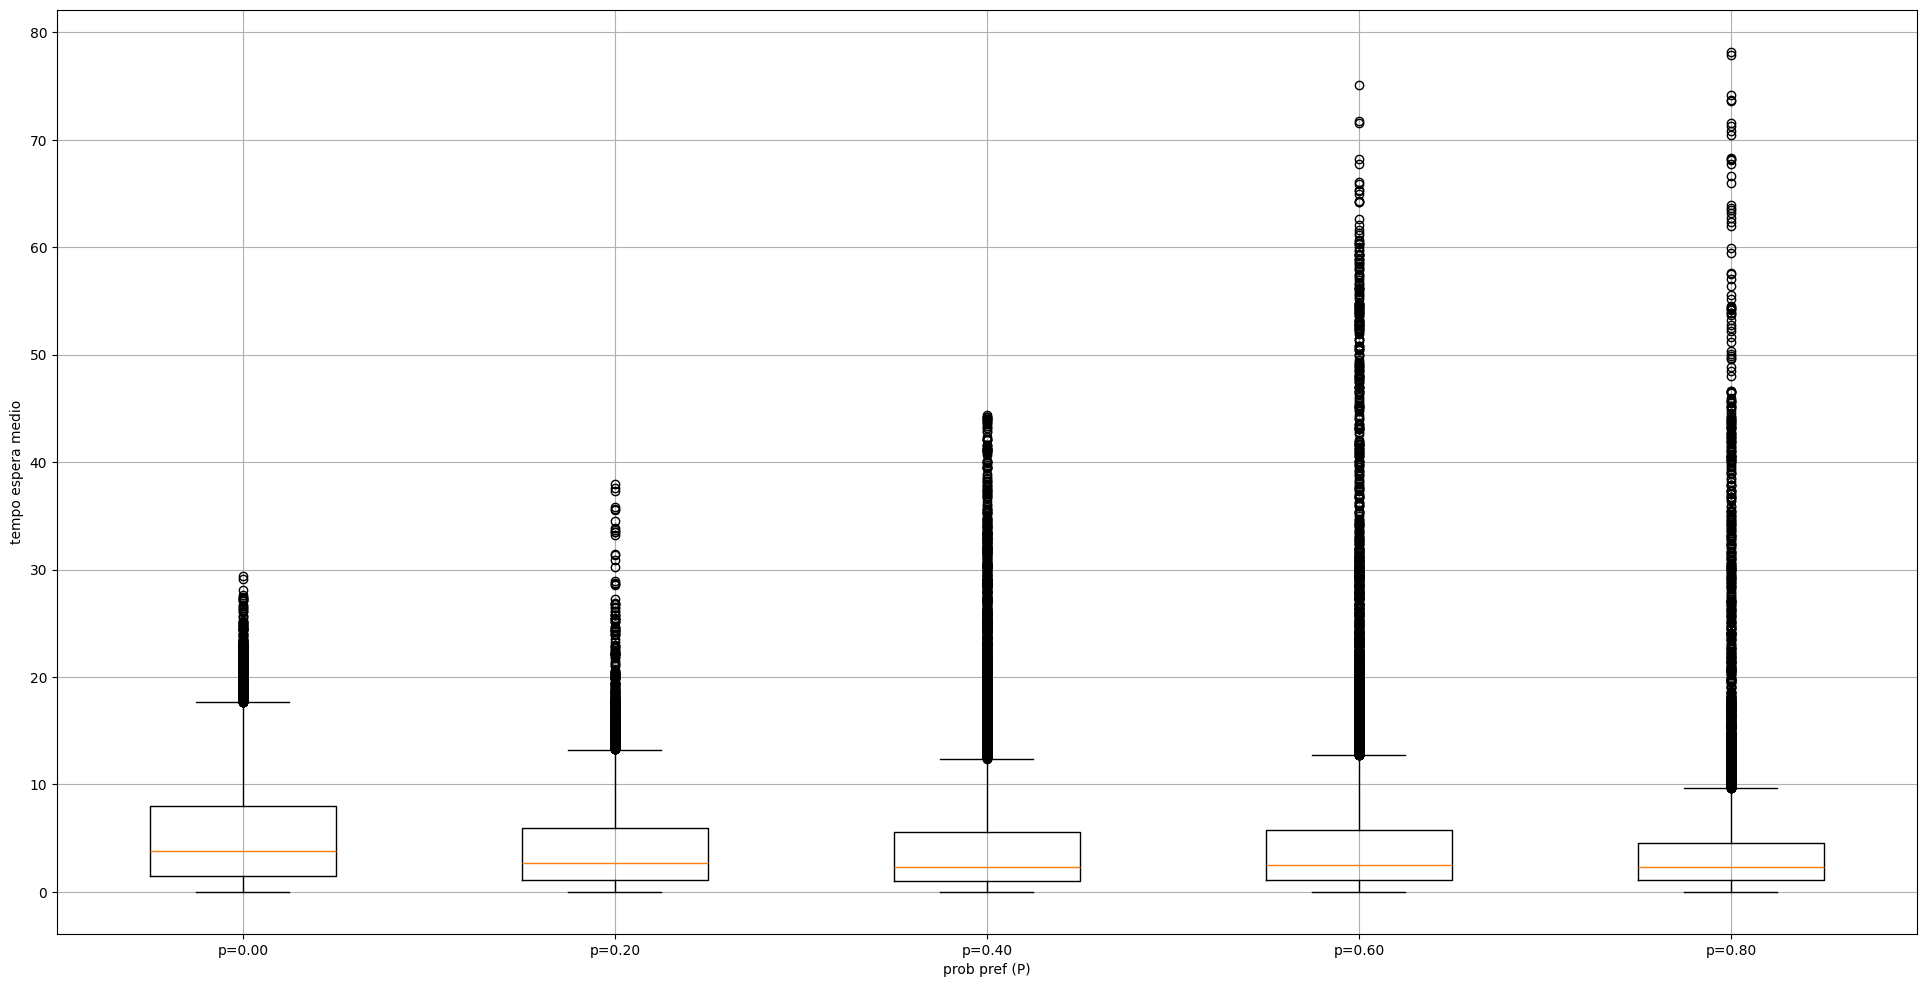

In [330]:
# B)
# diminui o tanto de p pra ficar melhor o plot
ps = np.arange(0,1,0.2)
lista_medias_esperas = []
todos_tempos = []

for p in ps:
    medias_esperas, tempos = banco(p)
    lista_medias_esperas.append(medias_esperas)
    todos_tempos.append(tempos)

tempos_por_p = []
for tempos in todos_tempos:
    tempos_por_p.append([t[0] for t in tempos])

plt.figure(figsize=(24, 12))
plt.boxplot(tempos_por_p, labels=[f'p={p:.2f}' for p in ps])
plt.xlabel('prob pref (P)')
plt.ylabel('tempo espera medio')
plt.grid()

5) Compare o tempo de espera (W) de 2 filas M/M/1 independentes com taxa de chegada λ = 1
cada uma e de 1 fila única M/M/2 com taxa de chegada λ = 2. Calcule o tempo médio que um
atendente fica ocioso em cada caso. Assuma a mesma taxa de serviço para todos os
atendentes.

In [351]:
def simular_mm1():
    lambda_val = 1
    mu = 1.2
    t_final = 10000
    # dicts para os tempos
    # quando cliente chega
    chegadas = {}
    # quando cliente sai
    saidas = {}
    # id do cliente
    id_cliente = 0
    tempo_total = 0
    # fila guarda id
    fila = []
    cliente_atual = None
    # tempo sem atender
    tempo_ocioso = 0

    while tempo_total < t_final:
        taxa_chegada = lambda_val
        taxa_servico = mu if cliente_atual is not None else 0
        tempo_prox_chegada = np.random.exponential(1/taxa_chegada)
        if taxa_servico > 0:
            tempo_prox_servico = np.random.exponential(1/taxa_servico)  
        else:
            tempo_prox_servico = float('inf')
        
        # atualiza ocioso
        if cliente_atual is None:
            tempo_ocioso += min(tempo_prox_chegada, tempo_prox_servico)
        
        if tempo_prox_chegada < tempo_prox_servico:
            # chegou cliente
            tempo_total += tempo_prox_chegada
            chegadas[id_cliente] = tempo_total
            fila.append(id_cliente)
            id_cliente += 1
        else:
            # terminou atender
            tempo_total += tempo_prox_servico
            if cliente_atual is not None:
                saidas[cliente_atual] = tempo_total
                cliente_atual = None
        
        # se fila vazia chama prox
        if cliente_atual is None and len(fila) > 0:
            cliente_atual = fila.pop(0)
    
    # tempos espera
    tempos_espera = []
    for cid in saidas.keys():
        tempo_espera = saidas[cid] - chegadas[cid]
        tempos_espera.append(tempo_espera)
    
    media_espera = np.mean(tempos_espera)
    media_ocioso = tempo_ocioso / tempo_total
    
    return media_espera, media_ocioso

In [356]:
def simular_mm2():
    lambda_val = 2
    mu = 1.2
    t_final = 10000
    # dicts para os tempos
    # quando cliente chega
    chegadas = {}
    # quando cliente sai
    saidas = {}
    # id do cliente
    id_cliente = 0
    tempo_total = 0
    # fila guarda id
    fila = []
    # dois atendentes
    clientes_atuais = [None, None]
    # tempo sem atender
    tempos_ociosos = [0, 0]
    
    while tempo_total < t_final:
        taxa_chegada = lambda_val
        taxas_servico = [mu if c is not None else 0 for c in clientes_atuais]
        tempo_prox_chegada = np.random.exponential(1/taxa_chegada)
        
        tempos_prox_servico = []
        for ts in taxas_servico:
            if ts>0:
                tempos_prox_servico.append(np.random.exponential(1/ts))
            else:
                tempos_prox_servico.append(float('inf'))
        
        # atualiza ocioso
        for i, cliente in enumerate(clientes_atuais):
            if cliente is None:
                tempos_ociosos[i] += min(tempo_prox_chegada, min(tempos_prox_servico))
        
        tempo_prox_servico = min(tempos_prox_servico)
        if tempo_prox_chegada < tempo_prox_servico:
            # chegou cliente
            tempo_total += tempo_prox_chegada
            chegadas[id_cliente] = tempo_total
            
            # procura livre
            atendente_livre = None
            for i, cliente in enumerate(clientes_atuais):
                if cliente is None:
                    atendente_livre = i
                    break
            
            # coloca no lugar
            if atendente_livre is not None:
                clientes_atuais[atendente_livre] = id_cliente
            else:
                fila.append(id_cliente)
            
            id_cliente += 1
        else:
            # terminou atender
            tempo_total += tempo_prox_servico
            atendente = tempos_prox_servico.index(tempo_prox_servico)
            
            if clientes_atuais[atendente] is not None:
                saidas[clientes_atuais[atendente]] = tempo_total
                clientes_atuais[atendente] = None
                
                # se fila vazia chama prox
                if len(fila) > 0:
                    clientes_atuais[atendente] = fila.pop(0)
    
    # tempos espera
    tempos_espera = []
    for cid in saidas.keys():
        tempo_espera = saidas[cid] - chegadas[cid]
        tempos_espera.append(tempo_espera)
    
    media_espera = np.mean(tempos_espera)
    media_ocioso = np.mean([t/tempo_total for t in tempos_ociosos])
    
    return media_espera, media_ocioso

0.1632805537669677


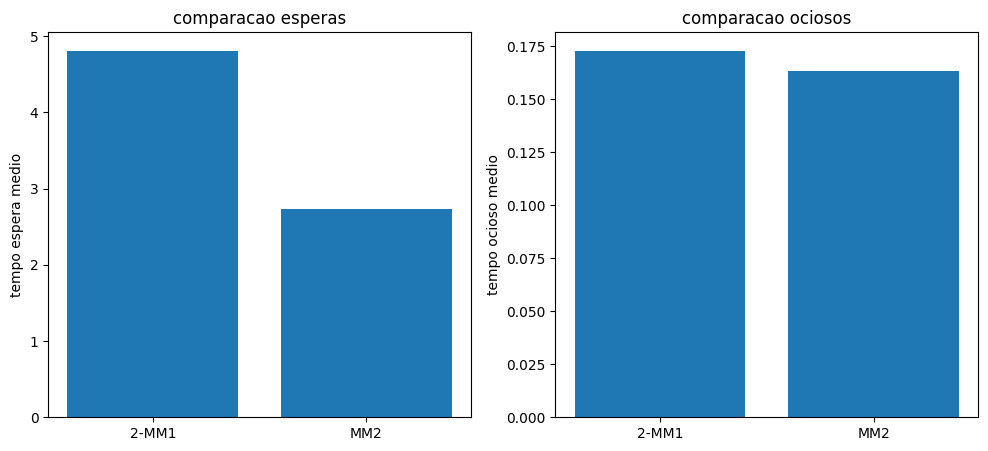

2-MM1:
	espera media: 5.24
	ocioso medio: 0.17

MM2:
	espera media: 2.97
	ocioso medio: 0.16


In [360]:
W1_mm1, ocioso1_mm1 = simular_mm1()
W2_mm1, ocioso2_mm1 = simular_mm1()
W_medio_mm1 = (W1_mm1 + W2_mm1) / 2
ocioso_medio_mm1 = (ocioso1_mm1 + ocioso2_mm1) / 2

W_mm2, ocioso_mm2 = simular_mm2()
print(ocioso_mm2)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(['2-MM1', 'MM2'], [W_medio_mm1, W_mm2])
plt.ylabel('tempo espera medio')
plt.title('comparacao esperas')

plt.subplot(1, 2, 2)
plt.bar(['2-MM1', 'MM2'], [ocioso_medio_mm1, ocioso_mm2])
plt.ylabel('tempo ocioso medio')
plt.title('comparacao ociosos')
plt.show()

print(f"2-MM1:")
print(f"\tespera media: {W1_medio:.2f}")
print(f"\tocioso medio: {ocioso_medio_mm1:.2}")
print(f"\nMM2:")
print(f"\tespera media: {W2:.2f}")
print(f"\tocioso medio: {ocioso_mm2:.2}")

6) Considere a rede de filas M/M/1 da figura abaixo, representando um trecho de avenidas de uma grande cidade, com cada fila representando um cruzamento congestionado. Considere os valores: λ1 = 10, λ2 = 14, μA = 15, μB = 30, μC = 24, μD = 20, μE = 6 (dados em veículos por minuto). A prefeitura deseja realizar obras para melhorar o fluxo de veículos em um dos 5 cruzamentos (isto é, aumentar a taxa de serviço), visando reduzir o tempo médio de espera (W) na rede. Mostre por simulação e discuta qual o cruzamento seria o melhor candidato para a melhoria.

In [371]:
import numpy as np
import matplotlib.pyplot as plt

def simular_rede_filas(max_sistema,muA=15,muB=30,muC=24,muD=20,muE=6):
    t_final=10000
    lambda1 = 10  
    lambda2 = 14
    
    # dicts para os tempos
    # quando cada cliente chega
    chegadas = {}
    # quando cada cliente sai
    saidas = {}
    # id dos clientes
    id_cliente = 0
    
    """
    estado 0: sistema vazio 
    estado 1: A 
    estado 2: B 
    estado 3: C 
    estado 4: D 
    estado 5: E 
    """
    transition_rates = [[0,             lambda1,     0,           lambda2,    0,           0      ],
                        [0,             0,           muA*0.25,    muA*0.75,   0,           0      ],
                        [0,             0,           0,           0,          muB,         0      ], 
                        [0,             0,           muC*0.7,     0,          0,           muC*0.3], 
                        [muD*0.7,       0,           muD*0.3,     0,          0,           0      ],
                        [muE,           0,           0,           0,          0,           0      ]]
    
    pessoas_sistema = [0]
    estado = 0
    tempo_total = 0
    filas = {'A': [], 'B': [], 'C': [], 'D': [], 'E': []}
    
    while tempo_total < t_final:
        tempos = []
        for tr in transition_rates[estado]:
            if tr == 0:
                tempos.append(float('inf'))
            else:
                # se o sistema ta cheio, nao permite chegadas
                if sum(len(q) for q in filas.values()) >= max_sistema:
                    tempos.append(float('inf'))
                else:
                    tempos.append(np.random.exponential(1/tr))
        
        tempo_min = min(tempos)
        tempo_total += tempo_min
        prox_estado = tempos.index(min(tempos))
        
        # chegada A
        if prox_estado == 1:
            chegadas[id_cliente] = tempo_total
            filas['A'].append(id_cliente)
            id_cliente += 1
            
        # chegada  C
        elif prox_estado == 3:
            chegadas[id_cliente] = tempo_total
            filas['C'].append(id_cliente)
            id_cliente += 1
            
        # saida A
        elif estado == 1:
            if len(filas['A']) > 0:
                cliente = filas['A'].pop(0)
                # 0.25 para B
                if np.random.random() < 0.25:  
                    filas['B'].append(cliente)
                # 0.75 para C
                else:  
                    filas['C'].append(cliente)
                    
        # saida B
        elif estado == 2:
            if len(filas['B']) > 0:
                cliente = filas['B'].pop(0)
                # 0.30 volta pro B
                if np.random.random() < 0.3:  
                    filas['B'].append(cliente)
                # 0.70 vai pro D
                else:  
                    filas['D'].append(cliente)
                    
        # saida C
        elif estado == 3:
            if len(filas['C']) > 0:
                cliente = filas['C'].pop(0)
                # 0.70 vai pro B
                if np.random.random() < 0.7:
                    filas['B'].append(cliente)
                # 0.30 vai pro E
                else:  
                    filas['E'].append(cliente)
                    
        # saoda D ou E
        elif estado in [4, 5]:
            servidor = 'D' if estado == 4 else 'E'
            if len(filas[servidor]) > 0:
                cliente = filas[servidor].pop(0)
                saidas[cliente] = tempo_total
        
        pessoas_sistema.append(sum(len(q) for q in filas.values()))
        estado = prox_estado
    
    pessoas_media = np.mean(pessoas_sistema)
    tempos_espera = []
    for cid in saidas.keys():
        if cid in chegadas:
            tempos_espera.append(saidas[cid] - chegadas[cid])
    
    if tempos_espera:
        tempo_medio_espera = np.mean(tempos_espera)
    else:
        tempo_medio_espera = 0
    
    return pessoas_media, tempo_medio_espera

tam_max = 20
mu_og = np.array([15,30,24,20,6])
# subindo eles uma taxa fixa para uma comparacao justa:
mu_alt = mu_og + 5

_,tempo_medio_og = simular_rede_filas(max_sistema=tam_max)
_,tempo_medio_altA = simular_rede_filas(max_sistema=tam_max,muA=mu_alt[0])
_,tempo_medio_altB = simular_rede_filas(max_sistema=tam_max,muB=mu_alt[1])
_,tempo_medio_altC = simular_rede_filas(max_sistema=tam_max,muC=mu_alt[2])
_,tempo_medio_altD = simular_rede_filas(max_sistema=tam_max,muD=mu_alt[3])
_,tempo_medio_altE = simular_rede_filas(max_sistema=tam_max,muE=mu_alt[4])

print(f'tempo medio para mus originais: {tempo_medio_og:.2f}')
print(f'tempo medio para muA = {mu_alt[0]:.2f}: {tempo_medio_altA:.2f}')
print(f'tempo medio para muB = {mu_alt[1]:.2f}: {tempo_medio_altB:.2f}')
print(f'tempo medio para muC = {mu_alt[2]:.2f}: {tempo_medio_altC:.2f}')
print(f'tempo medio para muD = {mu_alt[3]:.2f}: {tempo_medio_altD:.2f}')
print(f'tempo medio para muE = {mu_alt[4]:.2f}: {tempo_medio_altE:.2f}')

tempo medio para mus originais: 1.70
tempo medio para muA = 20.00: 1.10
tempo medio para muB = 35.00: 1.07
tempo medio para muC = 29.00: 1.04
tempo medio para muD = 25.00: 1.44
tempo medio para muE = 11.00: 1.11


Com acréscimo de 5 unidades em cada Mu, o que mais reduziu o tempo de espera W foi o muC, logo ele seria o melhor candidato para melhoria.